<a href="https://colab.research.google.com/github/UoA-eResearch/deep-learning-tutorial-2019/blob/master/Exercise%202%20-%20multi-class%20iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: The Iris Dataset
In this exercise we will create a neural network to classify 3 different types of Iris (Setosa, Versicolor and Virginica) based on their sepal length, sepal width, petal length and petal width.

![Irises](http://dataaspirant.com/wp-content/uploads/2017/01/irises.png)

This is a multi class classification problem. It is similar to the Pima Indian's binary classification exercise, but with three classes to predict instead of two.

### Q: How many steps are there in creating a neural network model? Please list those steps

*answer...*

### Import dependencies
Start by importing the dependencies we will need for the project

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

### Import data
The Iris dataset contains four features from 150 different Iris flowers. The features in the dataset are described below.

* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)
* Class: Iris setosa, Iris versicolor or Iris virginica

Sepals are the part of a flower that protect and support the petals. The petals surround the reproductive parts of the flower.

![Iris labeled](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

A snapshot of the dataset is illustrated below (not in order).

|Sepal Length|Sepal Width|Petal Length|Petal Width|Class|
|---|---|---|---|-----------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|7.0|3.2|4.7|1.4|Iris-versicolor|
|6.4|3.2|4.5|1.5|Iris-versicolor|
|6.3|3.3|6.0|2.5|Iris-virginica|
|5.8|2.7|5.1|1.9|Iris-virginica|

To load this data into memory, use the `np.loadtxt` function. The data type (`dtype`) is set to `str` because our input data is a mix of numbers and strings. This will be dealt with when we split the data.

In [65]:
data = np.loadtxt('https://raw.githubusercontent.com/UoA-eResearch/deep-learning-tutorial-2019/master/data/iris.csv', delimiter=",", dtype=str)
print(data[:6]) #Show the first 6 rows

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']]


Separate the data into input (X) and output (y) variables.

Note that we convert the input data into floats.

In [0]:
X = data[:, 0:4].astype(float)
y = data[:, 4]

If you look carefully at the target values, you will notice that they are strings, i.e. 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.

**Keras needs numbers or matrices to work with, so we will need to reformat the target values.**

The problem with converting the class values to numbers (e.g. 'Iris-setosa' becomes 0, 'Iris-versicolor' 1 etc) is that it implies that the target values are ordinal. That is, 'Iris-setosa' is somehow less than 'Iris-versicolor', which is not the case for this dataset.

A better way to represent classes in a multi-class classification problem, is to 'one hot encode' the target values. An example is shown below. A matrix of zeros is generated. Each row corresponds to a sample and each column corresponds to a particular class. A 1 is placed into the column to incidicate the class that it belongs too.

|Iris-setosa|Iris-versicolor|Iris-virginica|
|---|---|---|
|1|0|0|
|0|1|0|
|0|0|1|

One hot encoding is a two step process. First encode the target values (y) into an array of numbers using the `LabelEncoder` from scikit-learn and then one hot encode the numbers with the `np_utils.to_categorical` function.

In [67]:
y_encoded = LabelEncoder().fit(y).transform(y) # Convert the classes into numbers
y_encoded[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [68]:
y_one_hot_encoded = np_utils.to_categorical(y_encoded) # One hot encode the numbers
y_one_hot_encoded[45:55]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### Set seed
Set a seed value so that when we repeatedly run our code we will get the same result. Using the same seed is important when you want to compare algorithms.

In [0]:
seed = 7
np.random.seed(seed)

Like the previous exercise, use the `train_test_split` function from scikit-learn to split the input and target data into training, validation and test datasets.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_encoded, test_size=0.2, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

[[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [5.  3.5 1.3 0.3]
 [5.6 3.  4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [6.4 3.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.  3.4 4.5 1.6]
 [5.2 4.1 1.5 0.1]
 [7.2 3.6 6.1 2.5]
 [5.2 3.4 1.4 0.2]
 [5.9 3.2 4.8 1.8]
 [6.7 2.5 5.8 1.8]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 3.9 1.2]
 [6.9 3.2 5.7 2.3]
 [6.1 2.9 4.7 1.4]
 [6.  2.2 5.  1.5]
 [7.2 3.  5.8 1.6]
 [6.  3.  4.8 1.8]
 [6.2 2.9 4.3 1.3]
 [5.5 2.4 3.8 1.1]
 [5.8 2.7 5.1 1.9]
 [6.7 3.1 5.6 2.4]
 [6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]
 [4.6 3.6 1.  0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.  1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.  5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.  5.5 1.8]
 [5.7 3.  4.2 1.2]
 [5.  3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.  2.2 4.  1. ]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.

### Create the model
The code snippet below creates a very basic neural network model, with three layers: an input layer, a hidden layer and an output layer.

The first layer is a fully connected `Dense` layer. We use four neurons in the hidden layer and have 4 input neurons for the 4 features.

The last layer has 3 neurons, one for each class.

In [0]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

### Compile the model
We then compile the model. The loss function is set to `categorical_crossentropy` (different from the loss function used in the binary classification exercise) because we are performing multi-class classification.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model
Now that we have compiled the model, we can train it with the data we prepared earlier. We are using more epochs but a smaller batch size than the previous exercise.

To see the model training history in text, just don't include `verbose=0`

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=5)

Train on 96 samples, validate on 24 samples
Epoch 1/200
96/96 [==============================] - 0s 4ms/step - loss: 1.0998 - acc: 0.3438 - val_loss: 1.0979 - val_acc: 0.4167
Epoch 2/200
96/96 [==============================] - 0s 267us/step - loss: 1.0972 - acc: 0.5833 - val_loss: 1.0968 - val_acc: 0.6667
Epoch 3/200
96/96 [==============================] - 0s 274us/step - loss: 1.0953 - acc: 0.6458 - val_loss: 1.0951 - val_acc: 0.6250
Epoch 4/200
96/96 [==============================] - 0s 258us/step - loss: 1.0927 - acc: 0.3854 - val_loss: 1.0932 - val_acc: 0.2500
Epoch 5/200
96/96 [==============================] - 0s 307us/step - loss: 1.0887 - acc: 0.3438 - val_loss: 1.0900 - val_acc: 0.2500
Epoch 6/200
96/96 [==============================] - 0s 313us/step - loss: 1.0836 - acc: 0.3438 - val_loss: 1.0856 - val_acc: 0.2500
Epoch 7/200
96/96 [==============================] - 0s 259us/step - loss: 1.0771 - acc: 0.3854 - val_loss: 1.0793 - val_acc: 0.3750
Epoch 8/200
96/96 [========

### Examining the plot

In this model loss plot we can see that the model's loss gradually drops at it reaches 200 epochs and that our training and validation data loss do not deviate from each other meaning there is no overfitting present.

We can also see that the accuracy of the training and validation data sets increase in accuracy in a similar fashion meaning which also indicate that there is no significant overfitting in our model.

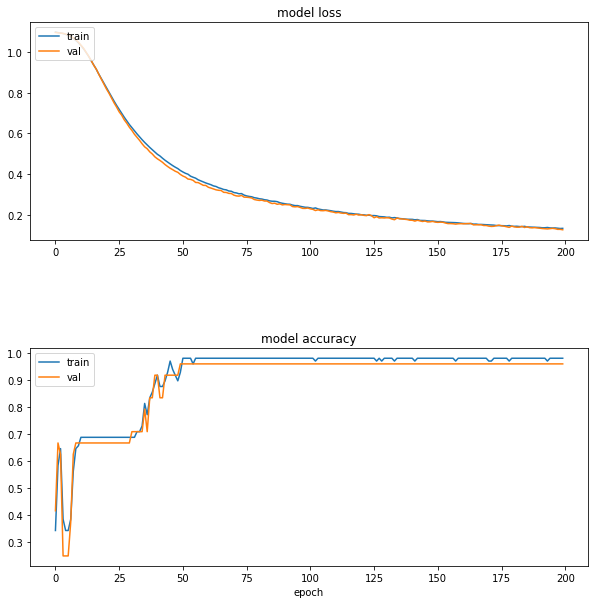

In [57]:
def plot_acc_loss(history):
    f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
    
    # Summarize history of accuracy
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('model loss')
    ax1.legend(['train', 'val'], loc='upper left')
    
    # Summarize history of accuracy
    ax2.plot(history.history['acc'])
    ax2.plot(history.history['val_acc'])
    ax2.set_title('model accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'val'], loc='upper left')
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
plot_acc_loss(history)

### Evaluate the model
Now that we have trained our model, we can evaluate it's predictive performance on our test data.

In [58]:
scores = model.evaluate(X_test, y_test)
print("\n\n{0}: {1:.2f}%".format(model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 72us/step


acc: 96.67%


Our accuracy across our test set is 96.67% meaning that if we were to use this model on new data from the same Iris dataset, it would correctly classify the Iris species 96.67% of the time.

### The Confusion Matrix

A confusion matrix is useful for describing the performance of a classification model. Instead of seeing generalised accuracy, we're able to look how each individual classification performs. 

In this case we can see that a sample of Versicolor was incorrectly classified as Virginica which we could try to improve in the future.

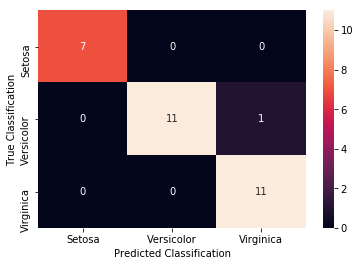

In [59]:
def draw_confusion_matrix(true, pred, labels):
  """
  Drawing confusion matrix
  """
  cm = metrics.confusion_matrix(true, pred, labels)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)
  ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica']+labels)
  ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica']+labels)
  ax.set_xlabel("Predicted Classification")
  ax.set_ylabel("True Classification")
  plt.show()
  return cm

y_pred = model.predict_classes(X_test)
y_test_encoded = [np.argmax(i) for i in y_test] # Reverse one hot encoded to label encoded
matrix = draw_confusion_matrix(y_test_encoded, y_pred, [0,1,2]) #[setosa,versicolor, virginica]

In [60]:
print("acc: {0:.2f}%".format(np.sum(np.diag(matrix))*100/np.sum(matrix)))

acc: 96.67%


# Key Points


*   Created a neural network to solve multiclass classification problem
*   "One hot encoded" to categorise string target variable
*  Different loss functions for different classfication problems
* Confusion matrix and model improvements


